In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregando a base de dados

In [5]:
df = pd.read_excel('base-seguros.xlsx', sheet_name='Base')
df

,Flag_Renovou,Idade,Perfil_Risco,Diferenca_Perfil,Genero,Profissao,Tempo_Apolice,Uso_Veiculo,Qte_Apolices,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,Veic_Garagem,Veic_Potencia,Veic_Regiao
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23055,0,32,down,only partner,Male,medical,3,private or freelance work,1,335.64,2 per year,342.49,347.66,320.25,4,1,underground garage,125-300 kW,Reg4
23056,1,46,stable,only partner,Female,medical,1,private or freelance work,1,254.15,1 per year,254.16,235.79,263.91,11,8,underground garage,25-50 kW,Reg9
23057,0,35,stable,only partner,Female,normal,1,private or freelance work,1,324.16,4 per year,324.17,353.12,324.17,18,14,other,75 kW,Reg4
23058,1,35,stable,only partner,Male,medical,0,private or freelance work,1,190.13,2 per year,190.14,227.93,174.94,14,11,private garage,100 kW,Reg10


In [6]:
# Tabela de frequência

def tab_freq(df, col):

    # Frequência Absoluta
    tab_freq = df[col].value_counts().reset_index()
    tab_freq.columns = [col, 'Frequência_Absoluta']

    # Frequência Relativa
    tab_freq['Frequência_Relativa'] = (100 * (tab_freq['Frequência_Absoluta'] / tab_freq['Frequência_Absoluta'].sum())).round(2)
    
    # Contagem Acumulada
    tab_freq['Frequência_Acumulada'] = tab_freq['Frequência_Absoluta'].cumsum()

    # Percentual Acumulado
    tab_freq['Percentual_Acumulado'] = tab_freq['Frequência_Relativa'].cumsum().round(2)

    return tab_freq

# Perfil de Risco

In [7]:
risco = tab_freq(df, 'Perfil_Risco')
risco

,Perfil_Risco,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,stable,12036,52.19,12036,52.19
1,down,10155,44.04,22191,96.23
2,up,869,3.77,23060,100.00


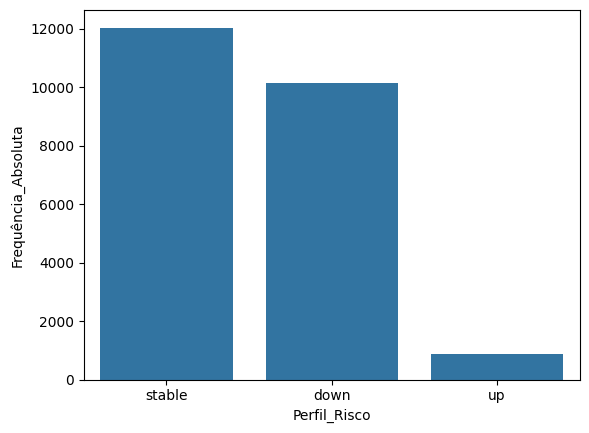

In [8]:
sns.barplot(x='Perfil_Risco', y='Frequência_Absoluta', data=risco)
plt.show()

# Diferença de Perfil

In [9]:
dif_perfil = tab_freq(df, 'Diferenca_Perfil')
dif_perfil

,Diferenca_Perfil,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,same,11155,48.37,11155,48.37
1,only partner,8128,35.25,19283,83.62
2,young drivers,1955,8.48,21238,92.10
3,all drivers > 24,1728,7.49,22966,99.59
4,learner 17,42,0.18,23008,99.77
5,commercial,40,0.17,23048,99.94
6,unknown,12,0.05,23060,99.99


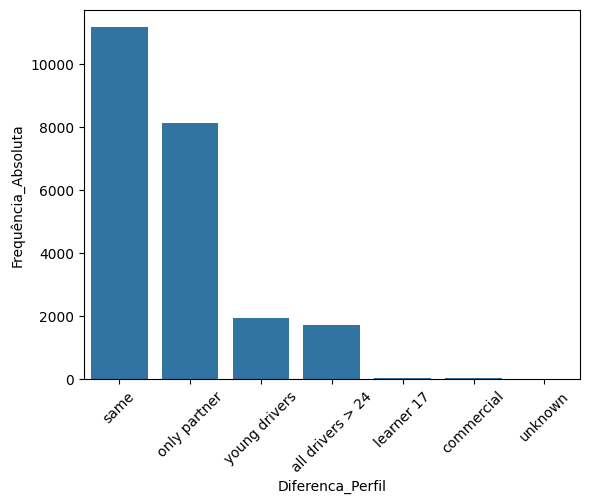

In [10]:
sns.barplot(x='Diferenca_Perfil', y='Frequência_Absoluta', data=dif_perfil)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Gênero

In [11]:
gender = tab_freq(df, 'Genero')
gender

,Genero,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,Male,14721,63.84,14721,63.84
1,Female,8339,36.16,23060,100.00


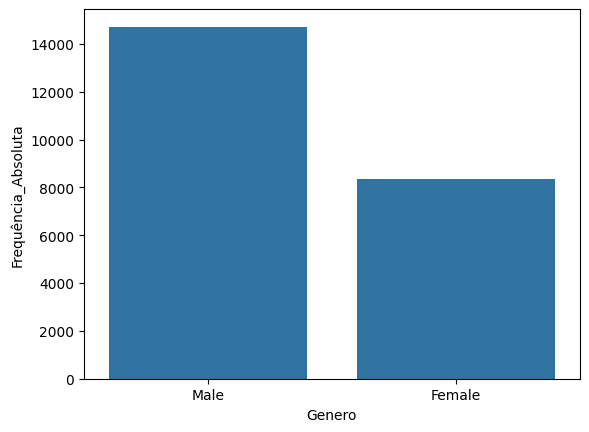

In [12]:
sns.barplot(x='Genero', y='Frequência_Absoluta', data=gender)
plt.show()

# Profissão

In [13]:
profissao = tab_freq(df, 'Profissao')
profissao

,Profissao,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,normal,13578,58.88,13578,58.88
1,medical,9482,41.12,23060,100.00


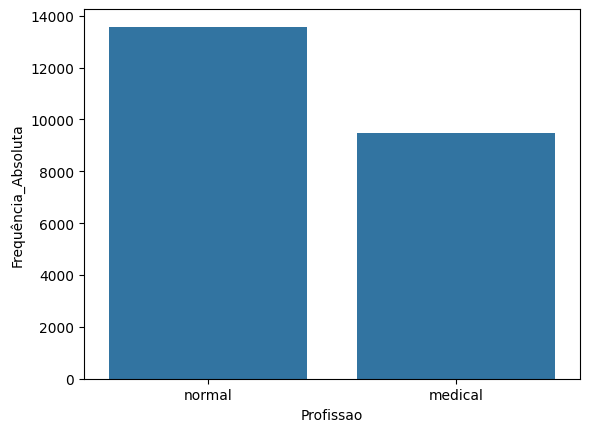

In [14]:
sns.barplot(x='Profissao', y='Frequência_Absoluta', data=profissao)
plt.show()

# Tempo de Apólice

In [15]:
tempo_apol = tab_freq(df, 'Tempo_Apolice')
tempo_apol

,Tempo_Apolice,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,0,8291,35.95,8291,35.95
1,1,4898,21.24,13189,57.19
2,2,2950,12.79,16139,69.98
3,4,985,4.27,17124,74.25
4,3,897,3.89,18021,78.14
5,7,888,3.85,18909,81.99
6,6,869,3.77,19778,85.76
7,8,814,3.53,20592,89.29
8,9,765,3.32,21357,92.61
9,5,698,3.03,22055,95.64


# Segmentando os dados de tempo de apólice

In [47]:
# Segmentando os dados de tempo de apólice
# 0 a 3 anos
# 4 a 8 anos
# 9 a 12 anos
# acima de 13 anos
labels = ['0 a 3 anos', '4 a 8 anos', '9 a 12 anos', 'acima de 13 anos']
bins = [float('-inf'), 3, 8, 12, float('inf')]
tempo_apol['Tempo_de_Apolice'] = pd.cut(tempo_apol['Tempo_Apolice'], bins=bins, labels=labels, ordered=True)
tempo_apol


,Tempo_Apolice,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado,Tempo_de_Apolice
0,0,8291,35.95,8291,35.95,0 a 3 anos
1,1,4898,21.24,13189,57.19,0 a 3 anos
2,2,2950,12.79,16139,69.98,0 a 3 anos
3,4,985,4.27,17124,74.25,4 a 8 anos
4,3,897,3.89,18021,78.14,0 a 3 anos
5,7,888,3.85,18909,81.99,4 a 8 anos
6,6,869,3.77,19778,85.76,4 a 8 anos
7,8,814,3.53,20592,89.29,4 a 8 anos
8,9,765,3.32,21357,92.61,9 a 12 anos
9,5,698,3.03,22055,95.64,4 a 8 anos


In [17]:
# Agrupando por tempo de apólice
tab_res_temp_apol = tempo_apol.groupby('Tempo_de_Apolice').agg({'Frequência_Absoluta': 'sum'}).reset_index()
tab_res_temp_apol

C:\Users\marce\AppData\Local\Temp\ipykernel_44296\3974383190.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab_res_temp_apol = tempo_apol.groupby('Tempo_de_Apolice').agg({'Frequência_Absoluta': 'sum'}).reset_index()


,Tempo_de_Apolice,Frequência_Absoluta
0,0 a 3 anos,17036
1,4 a 8 anos,4254
2,9 a 12 anos,1739
3,acima de 13 anos,31


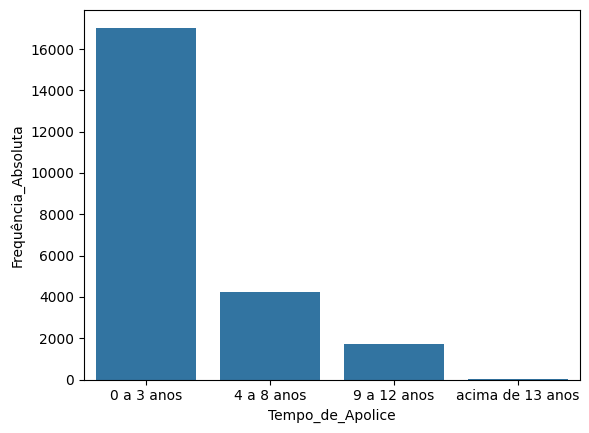

In [18]:
sns.barplot(x='Tempo_de_Apolice', y='Frequência_Absoluta', data=tab_res_temp_apol)
plt.show()

# Quantidade de apólices

In [41]:
qtd_apolice = tab_freq(df, 'Qte_Apolices')
qtd_apolice

,Qte_Apolices,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,1,18259,79.18,18259,79.18
1,2,3541,15.36,21800,94.54
2,3,793,3.44,22593,97.98
3,4,270,1.17,22863,99.15
4,5,87,0.38,22950,99.53
5,6,39,0.17,22989,99.70
6,7,31,0.13,23020,99.83
7,10,11,0.05,23031,99.88
8,8,9,0.04,23040,99.92
9,15,6,0.03,23046,99.95


In [40]:
qtd_apolice.dtypes

Qte_Apolices             float64
Frequência_Absoluta        int64
Frequência_Relativa      float64
Frequência_Acumulada       int64
Percentual_Acumulado     float64
Num_Apolices            category
dtype: object

In [42]:
qtd_apolice['Qte_Apolices'] = pd.to_numeric(qtd_apolice['Qte_Apolices'])

In [48]:
# Segmentando o número de apólices
# 1 apólice
# 2 apólices
# 3 ou mais apólices
labels = ['1 apólice', '2 apólices', '3 ou mais apólices']
bins = [0, 1, 2, float('inf')]
qtd_apolice['Num_Apolices'] = pd.cut(qtd_apolice['Qte_Apolices'], bins=bins, labels=labels, ordered=True)
qtd_apolice

,Qte_Apolices,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado,Num_Apolices
0,1,18259,79.18,18259,79.18,1 apólice
1,2,3541,15.36,21800,94.54,2 apólices
2,3,793,3.44,22593,97.98,3 ou mais apólices
3,4,270,1.17,22863,99.15,3 ou mais apólices
4,5,87,0.38,22950,99.53,3 ou mais apólices
5,6,39,0.17,22989,99.70,3 ou mais apólices
6,7,31,0.13,23020,99.83,3 ou mais apólices
7,10,11,0.05,23031,99.88,3 ou mais apólices
8,8,9,0.04,23040,99.92,3 ou mais apólices
9,15,6,0.03,23046,99.95,3 ou mais apólices


In [45]:
# Agrupando por número de apólice
num_apolices = qtd_apolice.groupby('Num_Apolices').agg({'Frequência_Absoluta': 'sum'}).reset_index()
num_apolices

C:\Users\marce\AppData\Local\Temp\ipykernel_44296\2655905578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_apolices = qtd_apolice.groupby('Num_Apolices').agg({'Frequência_Absoluta': 'sum'}).reset_index()


,Num_Apolices,Frequência_Absoluta
0,1 apólice,18259
1,2 apólices,3541
2,3 ou mais apólices,1260


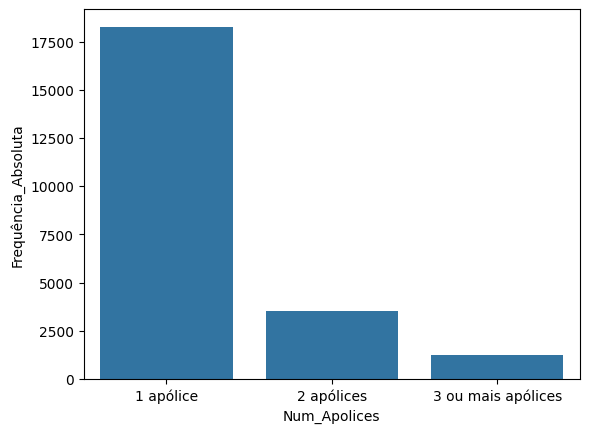

In [46]:
sns.barplot(x='Num_Apolices', y='Frequência_Absoluta', data=num_apolices)
plt.show()

In [ ]:
cabecalhos = list(df.columns)
cabecalhos

['Flag_Renovou',
 'Idade',
 'Perfil_Risco',
 'Diferenca_Perfil',
 'Genero',
 'Profissao',
 'Tempo_Apolice',
 'Uso_Veiculo',
 'Qte_Apolices',
 'Premio_Final',
 'Premio_Qte_Parc',
 'Premio_Pago_Ult',
 'Premio_Mercado',
 'Premio_Orig',
 'Veic_Idade',
 'Veic_Idade_Compra',
 'Veic_Garagem',
 'Veic_Potencia',
 'Veic_Regiao']

# Uso do Veículo

In [ ]:
uso_veiculo = tab_freq(df, 'Uso_Veiculo')
uso_veiculo

,Uso_Veiculo,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,private or freelance work,19567,84.85,19567,84.85
1,unknown,3483,15.10,23050,99.95
2,commercial,10,0.04,23060,99.99


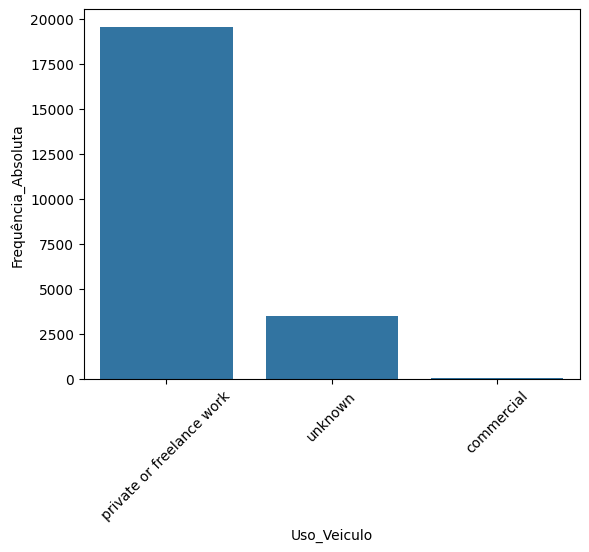

In [ ]:
sns.barplot(x='Uso_Veiculo', y='Frequência_Absoluta', data=uso_veiculo)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Região do Veículo

In [ ]:
regiao_veic = tab_freq(df, 'Veic_Regiao')
regiao_veic

,Veic_Regiao,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,Reg4,4325,18.76,4325,18.76
1,Reg7,3156,13.69,7481,32.45
2,Reg8,3074,13.33,10555,45.78
3,Reg5,2391,10.37,12946,56.15
4,Reg3,1827,7.92,14773,64.07
5,Reg12,1325,5.75,16098,69.82
6,Reg14,1289,5.59,17387,75.41
7,Reg9,1169,5.07,18556,80.48
8,Reg6,1119,4.85,19675,85.33
9,Reg10,1057,4.58,20732,89.91


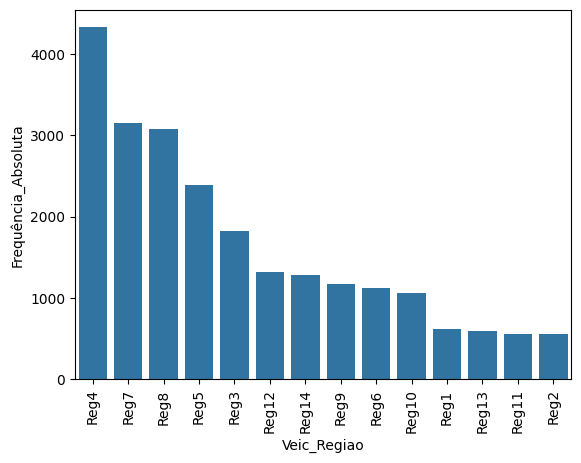

In [ ]:
sns.barplot(x='Veic_Regiao', y='Frequência_Absoluta', data=regiao_veic)
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Tipo de Garagem

In [ ]:
tab_freq(df, 'Veic_Garagem')

,Veic_Garagem,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,private garage,8863,38.43,8863,38.43
1,street,5468,23.71,14331,62.14
2,other,2243,9.73,16574,71.87
3,parking deck,2243,9.73,18817,81.60
4,unknown,1575,6.83,20392,88.43
5,carport,1413,6.13,21805,94.56
6,underground garage,1056,4.58,22861,99.14
7,private estate,199,0.86,23060,100.00


# Prêmios pagos

In [51]:
df['Premio_Final'].describe()

count    23060.000000
mean       374.123791
std        212.899174
min         46.550000
25%        232.837500
50%        312.250000
75%        448.370000
max       2948.050000
Name: Premio_Final, dtype: float64

In [67]:
df_premios = df[['Premio_Final', 'Premio_Qte_Parc', 'Premio_Pago_Ult', 'Premio_Mercado', 'Premio_Orig']]
df_premios

,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig
0,232.46,4 per year,232.47,221.56,243.59
1,208.53,4 per year,208.54,247.56,208.54
2,277.34,1 per year,277.35,293.32,277.35
3,239.51,4 per year,244.40,310.91,219.95
4,554.54,4 per year,554.55,365.46,519.50
...,...,...,...,...,...
23055,335.64,2 per year,342.49,347.66,320.25
23056,254.15,1 per year,254.16,235.79,263.91
23057,324.16,4 per year,324.17,353.12,324.17
23058,190.13,2 per year,190.14,227.93,174.94


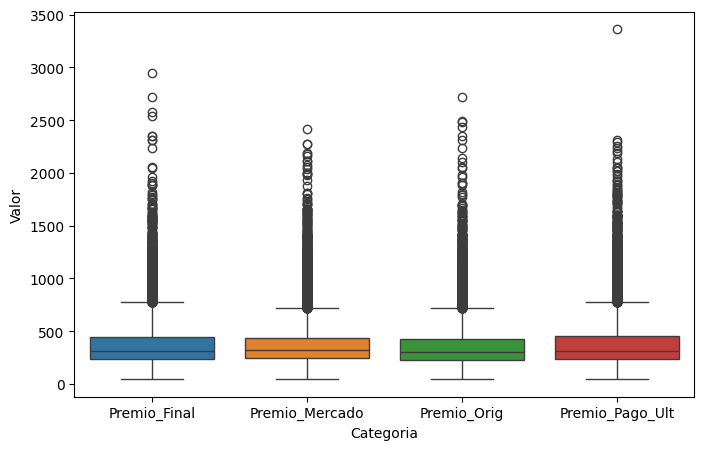

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Premio_Final', 'Premio_Mercado', 'Premio_Orig', 'Premio_Pago_Ult']])
plt.xlabel('Categoria')
plt.ylabel('Valor')
# plt.title('Comparação de Boxplot entre Premio_A e Premio_B')
plt.show()

# Análise de renovaçao de apólices

In [ ]:
tab_freq(df, 'Flag_Renovou')

,Flag_Renovou,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,0,20106,87.19,20106,87.19
1,1,2954,12.81,23060,100.00


In [ ]:
import numpy as np

In [75]:
df_trabalho = df.copy()

In [76]:
df_trabalho['Renovou?'] = np.where(df_trabalho['Flag_Renovou'] == 1, 'Sim', 'Não')

In [ ]:
df_trabalho.head()

,Flag_Renovou,Idade,Perfil_Risco,Diferenca_Perfil,Genero,Profissao,Tempo_Apolice,Uso_Veiculo,Qte_Apolices,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,Veic_Garagem,Veic_Potencia,Veic_Regiao,Renovou?
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7,Não
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4,Sim
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7,Sim
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5,Não
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14,Não


In [ ]:
tab_freq(df_trabalho, 'Renovou?')

,Renovou?,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,Percentual_Acumulado
0,Não,20106,87.19,20106,87.19
1,Sim,2954,12.81,23060,100.00


# Information Value (IV) para as variáveis

In [ ]:
# Renovou x Perfil de Risco
tab_freq_perf_risco = pd.crosstab(df_trabalho['Perfil_Risco'], df_trabalho['Renovou?'], margins=True, margins_name='Total', normalize='columns').round(2)
tab_freq_perf_risco

Renovou?,Não,Sim,Total
Perfil_Risco,,,
down,0.42,0.55,0.44
stable,0.54,0.42,0.52
up,0.04,0.03,0.04


In [ ]:
# Agora vamos incluir a coluna de ln(ODDS)
tab_freq_perf_risco['ln(ODDS)'] = np.log(tab_freq_perf_risco['Não'] / tab_freq_perf_risco['Sim'])
tab_freq_perf_risco

Renovou?,Não,Sim,Total,ln(ODDS)
Perfil_Risco,,,,
down,0.42,0.55,0.44,-0.269664
stable,0.54,0.42,0.52,0.251314
up,0.04,0.03,0.04,0.287682


In [ ]:
# Vamos agora calcular os IV's
tab_freq_perf_risco['IV'] = ((tab_freq_perf_risco['Não'] - tab_freq_perf_risco['Sim'])*tab_freq_perf_risco['ln(ODDS)'])
tab_freq_perf_risco

Renovou?,Não,Sim,Total,ln(ODDS),IV
Perfil_Risco,,,,,
down,0.42,0.55,0.44,-0.269664,0.035056
stable,0.54,0.42,0.52,0.251314,0.030158
up,0.04,0.03,0.04,0.287682,0.002877


In [ ]:
# Agora vamos calcular a somatória dos IV's para ter o IV de análise
iv_perf_risco = tab_freq_perf_risco['IV'].sum().round(2)
iv_perf_risco

np.float64(0.07)

# Resultado:
O perfil de risco tem um poder de separação fraco para a flag Renovou_Seguro.

# Função para reutilização do cálculo de IV

In [86]:
def calcular_iv(df, coluna_desejada, coluna_flag):
    """
    Calcula a tabela de frequência cruzada normalizada e o Information Value (IV) 
    para a variável indicada em relação à renovação.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados.
    coluna_risco (str): Nome da coluna representando o perfil de risco.
    coluna_renovou (str): Nome da coluna representando a renovação.

    Retorna:
    tuple: (pd.DataFrame, float) -> Tabela de frequência cruzada com IV e o valor total do IV.
    """
    tab_freq = pd.crosstab(df[coluna_desejada], df[coluna_flag], 
                           margins=True, margins_name='Total', 
                           normalize='columns').round(2)
    
    # Calculando ln(ODDS) e IV
    tab_freq['ln(ODDS)'] = np.log(tab_freq['Não'] + 1e-10 / tab_freq['Sim'] + 1e-10)
    tab_freq['IV'] = (tab_freq['Não'] - tab_freq['Sim']) * tab_freq['ln(ODDS)']
    
    # Calculando o IV total
    iv_total = tab_freq['IV'].sum().round(3)
    
    return tab_freq, iv_total


In [87]:
calcular_iv(df_trabalho, 'Idade', 'Renovou?')

(Renovou?   Não   Sim  Total  ln(ODDS)        IV
 Idade                                          
 19        0.00  0.00   0.00       inf       NaN
 20        0.00  0.00   0.00       inf       NaN
 21        0.00  0.00   0.00       inf       NaN
 22        0.01  0.01   0.01 -4.605169 -0.000000
 23        0.01  0.02   0.01 -4.605170  0.046052
 ...        ...   ...    ...       ...       ...
 81        0.00  0.00   0.00       inf       NaN
 82        0.00  0.00   0.00       inf       NaN
 83        0.00  0.00   0.00       inf       NaN
 84        0.00  0.00   0.00       inf       NaN
 85        0.00  0.00   0.00       inf       NaN
 
 [67 rows x 5 columns],
 np.float64(inf))

In [88]:
calcular_iv(df_trabalho, 'Perfil_Risco', 'Renovou?')

(Renovou?       Não   Sim  Total  ln(ODDS)        IV
 Perfil_Risco                                       
 down          0.42  0.55   0.44 -0.867501  0.112775
 stable        0.54  0.42   0.52 -0.616186 -0.073942
 up            0.04  0.03   0.04 -3.218876 -0.032189,
 np.float64(0.007))

In [89]:
calcular_iv(df_trabalho, 'Genero', 'Renovou?')

(Renovou?   Não   Sim  Total  ln(ODDS)        IV
 Genero                                         
 Female    0.37  0.34   0.36 -0.994252 -0.029828
 Male      0.63  0.66   0.64 -0.462035  0.013861,
 np.float64(-0.016))

O gênero não tem um poder de separação forte para a decisão entre renovar ou não o seguro.

In [91]:
calcular_iv(df_trabalho, 'Profissao', 'Renovou?')

(Renovou?    Não   Sim  Total  ln(ODDS)        IV
 Profissao                                       
 medical    0.41  0.39   0.41 -0.891598 -0.017832
 normal     0.59  0.61   0.59 -0.527633  0.010553,
 np.float64(-0.007))

In [92]:
calcular_iv(df_trabalho, 'Tempo_Apolice', 'Renovou?')

(Renovou?        Não   Sim  Total  ln(ODDS)        IV
 Tempo_Apolice                                       
 0              0.36  0.38   0.36 -1.021651  0.020433
 1              0.21  0.26   0.21 -1.560648  0.078032
 2              0.13  0.14   0.13 -2.040221  0.020402
 3              0.04  0.04   0.04 -3.218876 -0.000000
 4              0.04  0.05   0.04 -3.218876  0.032189
 5              0.03  0.03   0.03 -3.506558 -0.000000
 6              0.04  0.02   0.04 -3.218876 -0.064378
 7              0.04  0.02   0.04 -3.218876 -0.064378
 8              0.04  0.03   0.04 -3.218876 -0.032189
 9              0.03  0.02   0.03 -3.506558 -0.035066
 10             0.03  0.02   0.03 -3.506558 -0.035066
 11             0.01  0.01   0.01 -4.605169 -0.000000
 12             0.00  0.00   0.00       inf       NaN
 13             0.00  0.00   0.00       inf       NaN
 14             0.00  0.00   0.00       inf       NaN
 15             0.00  0.00   0.00       inf       NaN
 16             0.00  0.00  

In [93]:
calcular_iv(df_trabalho, 'Uso_Veiculo', 'Renovou?')

(Renovou?                    Não  Sim  Total  ln(ODDS)        IV
 Uso_Veiculo                                                    
 commercial                 0.00  0.0   0.00       inf       NaN
 private or freelance work  0.84  0.9   0.85 -0.174353  0.010461
 unknown                    0.16  0.1   0.15 -1.832581 -0.109955,
 np.float64(-0.099))

In [94]:
calcular_iv(df_trabalho, 'Veic_Idade', 'Renovou?')

(Renovou?     Não   Sim  Total   ln(ODDS)        IV
 Veic_Idade                                        
 0           0.00  0.00   0.00        inf       NaN
 1           0.00  0.00   0.00        inf       NaN
 2           0.00  0.00   0.00        inf       NaN
 3           0.00  0.01   0.00 -18.410730  0.184107
 4           0.01  0.01   0.01  -4.605169 -0.000000
 5           0.01  0.01   0.01  -4.605169 -0.000000
 6           0.02  0.02   0.02  -3.912023 -0.000000
 7           0.02  0.03   0.02  -3.912023  0.039120
 8           0.03  0.04   0.04  -3.506558  0.035066
 9           0.05  0.06   0.05  -2.995732  0.029957
 10          0.07  0.08   0.07  -2.659260  0.026593
 11          0.08  0.09   0.08  -2.525729  0.025257
 12          0.10  0.12   0.10  -2.302585  0.046052
 13          0.10  0.10   0.10  -2.302585 -0.000000
 14          0.10  0.09   0.10  -2.302585 -0.023026
 15          0.10  0.09   0.10  -2.302585 -0.023026
 16          0.09  0.08   0.09  -2.407946 -0.024079
 17         

# A idade do veículo tem um poder médio de separação para a flag de renovação.

In [95]:
calcular_iv(df_trabalho, 'Veic_Potencia', 'Renovou?')

(Renovou?        Não   Sim  Total  ln(ODDS)        IV
 Veic_Potencia                                       
 100 kW         0.22  0.23   0.22 -1.514128  0.015141
 125-300 kW     0.08  0.07   0.07 -2.525729 -0.025257
 150 kW         0.03  0.02   0.03 -3.506558 -0.035066
 175 kW         0.01  0.01   0.01 -4.605169 -0.000000
 200 kW         0.00  0.00   0.00       inf       NaN
 225 kW         0.00  0.00   0.00       inf       NaN
 25-50 kW       0.22  0.21   0.22 -1.514128 -0.015141
 250 kW         0.00  0.00   0.00       inf       NaN
 275 kW         0.00  0.00   0.00       inf       NaN
 300 kW         0.00  0.00   0.00       inf       NaN
 75 kW          0.45  0.46   0.45 -0.798508  0.007985,
 np.float64(-0.052))

In [96]:
calcular_iv(df_trabalho, 'Tempo_Apolice', 'Renovou?')

(Renovou?        Não   Sim  Total  ln(ODDS)        IV
 Tempo_Apolice                                       
 0              0.36  0.38   0.36 -1.021651  0.020433
 1              0.21  0.26   0.21 -1.560648  0.078032
 2              0.13  0.14   0.13 -2.040221  0.020402
 3              0.04  0.04   0.04 -3.218876 -0.000000
 4              0.04  0.05   0.04 -3.218876  0.032189
 5              0.03  0.03   0.03 -3.506558 -0.000000
 6              0.04  0.02   0.04 -3.218876 -0.064378
 7              0.04  0.02   0.04 -3.218876 -0.064378
 8              0.04  0.03   0.04 -3.218876 -0.032189
 9              0.03  0.02   0.03 -3.506558 -0.035066
 10             0.03  0.02   0.03 -3.506558 -0.035066
 11             0.01  0.01   0.01 -4.605169 -0.000000
 12             0.00  0.00   0.00       inf       NaN
 13             0.00  0.00   0.00       inf       NaN
 14             0.00  0.00   0.00       inf       NaN
 15             0.00  0.00   0.00       inf       NaN
 16             0.00  0.00  

In [97]:
calcular_iv(df_trabalho, 'Qte_Apolices', 'Renovou?')

(Renovou?       Não   Sim  Total  ln(ODDS)        IV
 Qte_Apolices                                       
 1             0.79  0.80   0.79 -0.235722  0.002357
 2             0.15  0.15   0.15 -1.897120 -0.000000
 3             0.03  0.04   0.03 -3.506558  0.035066
 4             0.01  0.01   0.01 -4.605169 -0.000000
 5             0.00  0.00   0.00       inf       NaN
 6             0.00  0.00   0.00       inf       NaN
 7             0.00  0.00   0.00       inf       NaN
 8             0.00  0.00   0.00       inf       NaN
 9             0.00  0.00   0.00       inf       NaN
 10            0.00  0.00   0.00       inf       NaN
 11            0.00  0.00   0.00       inf       NaN
 12            0.00  0.00   0.00       inf       NaN
 13            0.00  0.00   0.00       inf       NaN
 14            0.00  0.00   0.00       inf       NaN
 15            0.00  0.00   0.00       inf       NaN,
 np.float64(0.037))

In [98]:
calcular_iv(df_trabalho, 'Premio_Final', 'Renovou?')

(Renovou?      Não  Sim  Total  ln(ODDS)  IV
 Premio_Final                               
 46.55         0.0  0.0    0.0       inf NaN
 73.53         0.0  0.0    0.0       inf NaN
 79.56         0.0  0.0    0.0       inf NaN
 81.1          0.0  0.0    0.0       inf NaN
 81.27         0.0  0.0    0.0       inf NaN
 ...           ...  ...    ...       ...  ..
 2352.9        0.0  0.0    0.0       inf NaN
 2539.34       0.0  0.0    0.0       inf NaN
 2580.27       0.0  0.0    0.0       inf NaN
 2716.07       0.0  0.0    0.0       inf NaN
 2948.05       0.0  0.0    0.0       inf NaN
 
 [14669 rows x 5 columns],
 np.float64(0.0))

In [99]:
calcular_iv(df_trabalho, 'Veic_Idade_Compra', 'Renovou?')

(Renovou?            Não   Sim  Total  ln(ODDS)        IV
 Veic_Idade_Compra                                       
 0                  0.13  0.10   0.12 -2.040221 -0.061207
 1                  0.03  0.03   0.03 -3.506558 -0.000000
 2                  0.03  0.03   0.03 -3.506558 -0.000000
 3                  0.05  0.06   0.05 -2.995732  0.029957
 4                  0.05  0.05   0.05 -2.995732 -0.000000
 5                  0.05  0.05   0.05 -2.995732 -0.000000
 6                  0.06  0.07   0.06 -2.813411  0.028134
 7                  0.07  0.09   0.07 -2.659260  0.053185
 8                  0.08  0.09   0.08 -2.525729  0.025257
 9                  0.07  0.08   0.07 -2.659260  0.026593
 10                 0.07  0.07   0.07 -2.659260 -0.000000
 11                 0.07  0.06   0.06 -2.659260 -0.026593
 12                 0.06  0.05   0.06 -2.813411 -0.028134
 13                 0.05  0.04   0.05 -2.995732 -0.029957
 14                 0.04  0.03   0.04 -3.218876 -0.032189
 15           

In [100]:
calcular_iv(df_trabalho, 'Veic_Regiao', 'Renovou?')

(Renovou?      Não   Sim  Total  ln(ODDS)        IV
 Veic_Regiao                                       
 Reg1         0.03  0.02   0.03 -3.506558 -0.035066
 Reg10        0.05  0.05   0.05 -2.995732 -0.000000
 Reg11        0.02  0.03   0.02 -3.912023  0.039120
 Reg12        0.05  0.08   0.06 -2.995732  0.089872
 Reg13        0.03  0.03   0.03 -3.506558 -0.000000
 Reg14        0.05  0.07   0.06 -2.995732  0.059915
 Reg2         0.03  0.01   0.02 -3.506558 -0.070131
 Reg3         0.08  0.08   0.08 -2.525729 -0.000000
 Reg4         0.19  0.19   0.19 -1.660731 -0.000000
 Reg5         0.11  0.08   0.10 -2.207275 -0.066218
 Reg6         0.05  0.05   0.05 -2.995732 -0.000000
 Reg7         0.14  0.13   0.14 -1.966113 -0.019661
 Reg8         0.13  0.14   0.13 -2.040221  0.020402
 Reg9         0.05  0.06   0.05 -2.995732  0.029957,
 np.float64(0.048))